In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = '2'
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '3'
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dataset
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy as d_copy
import random

In [2]:
folderpath = "/media/3/Network/filter/pooling4/case11/F4F_weight"
files = sorted(os.listdir("/media/3/Network/filter/pooling4/case11/F4F_weight"))
files

['F4F_bias_fc1_train_epoch_001.pt',
 'F4F_bias_fc1_train_epoch_002.pt',
 'F4F_bias_fc1_train_epoch_003.pt',
 'F4F_bias_fc1_train_epoch_004.pt',
 'F4F_bias_fc1_train_epoch_005.pt',
 'F4F_bias_fc1_train_epoch_006.pt',
 'F4F_bias_fc1_train_epoch_007.pt',
 'F4F_bias_fc1_train_epoch_008.pt',
 'F4F_bias_fc1_train_epoch_009.pt',
 'F4F_bias_fc1_train_epoch_010.pt',
 'F4F_bias_fc1_train_epoch_011.pt',
 'F4F_bias_fc1_train_epoch_012.pt',
 'F4F_bias_fc1_train_epoch_013.pt',
 'F4F_bias_fc1_train_epoch_014.pt',
 'F4F_bias_fc1_train_epoch_015.pt',
 'F4F_bias_fc1_train_epoch_016.pt',
 'F4F_bias_fc1_train_epoch_017.pt',
 'F4F_bias_fc1_train_epoch_018.pt',
 'F4F_bias_fc1_train_epoch_019.pt',
 'F4F_bias_fc1_train_epoch_020.pt',
 'F4F_bias_fc1_train_epoch_021.pt',
 'F4F_bias_fc2_train_epoch_001.pt',
 'F4F_bias_fc2_train_epoch_002.pt',
 'F4F_bias_fc2_train_epoch_003.pt',
 'F4F_bias_fc2_train_epoch_004.pt',
 'F4F_bias_fc2_train_epoch_005.pt',
 'F4F_bias_fc2_train_epoch_006.pt',
 'F4F_bias_fc2_train_epoch_0

In [3]:
!ls $folderpath"/../.."

case1	case15	case4  conv5_1.h5		    FC1_only
case10	case16	case5  conv5_1_only		    only_error_input_F4F
case11	case17	case6  conv5_1_original.pt
case12	case18	case7  conv5_1_training_false_case
case13	case2	case8  conv5_1_training_true_case
case14	case3	case9  F4F_weight


In [14]:
original_filter_path = "/media/3/Network/filter/pooling4/conv5_1_original.pt"
new_filter_path = "/media/3/Network/filter/pooling4/case13/only_error_input_F4F/conv5_1_train_epoch_021.pt"
new_filter = torch.load(new_filter_path).cpu().detach().numpy()
original_filter = torch.load(original_filter_path).cpu().detach().numpy()

In [15]:
new_filter.shape,original_filter.shape

((512, 512, 3, 3), (512, 512, 3, 3))

In [16]:
new_filter[0].shape

(512, 3, 3)

In [17]:

#val = np.squeeze(val,axis=1) 

In [18]:
val.shape

(4608,)

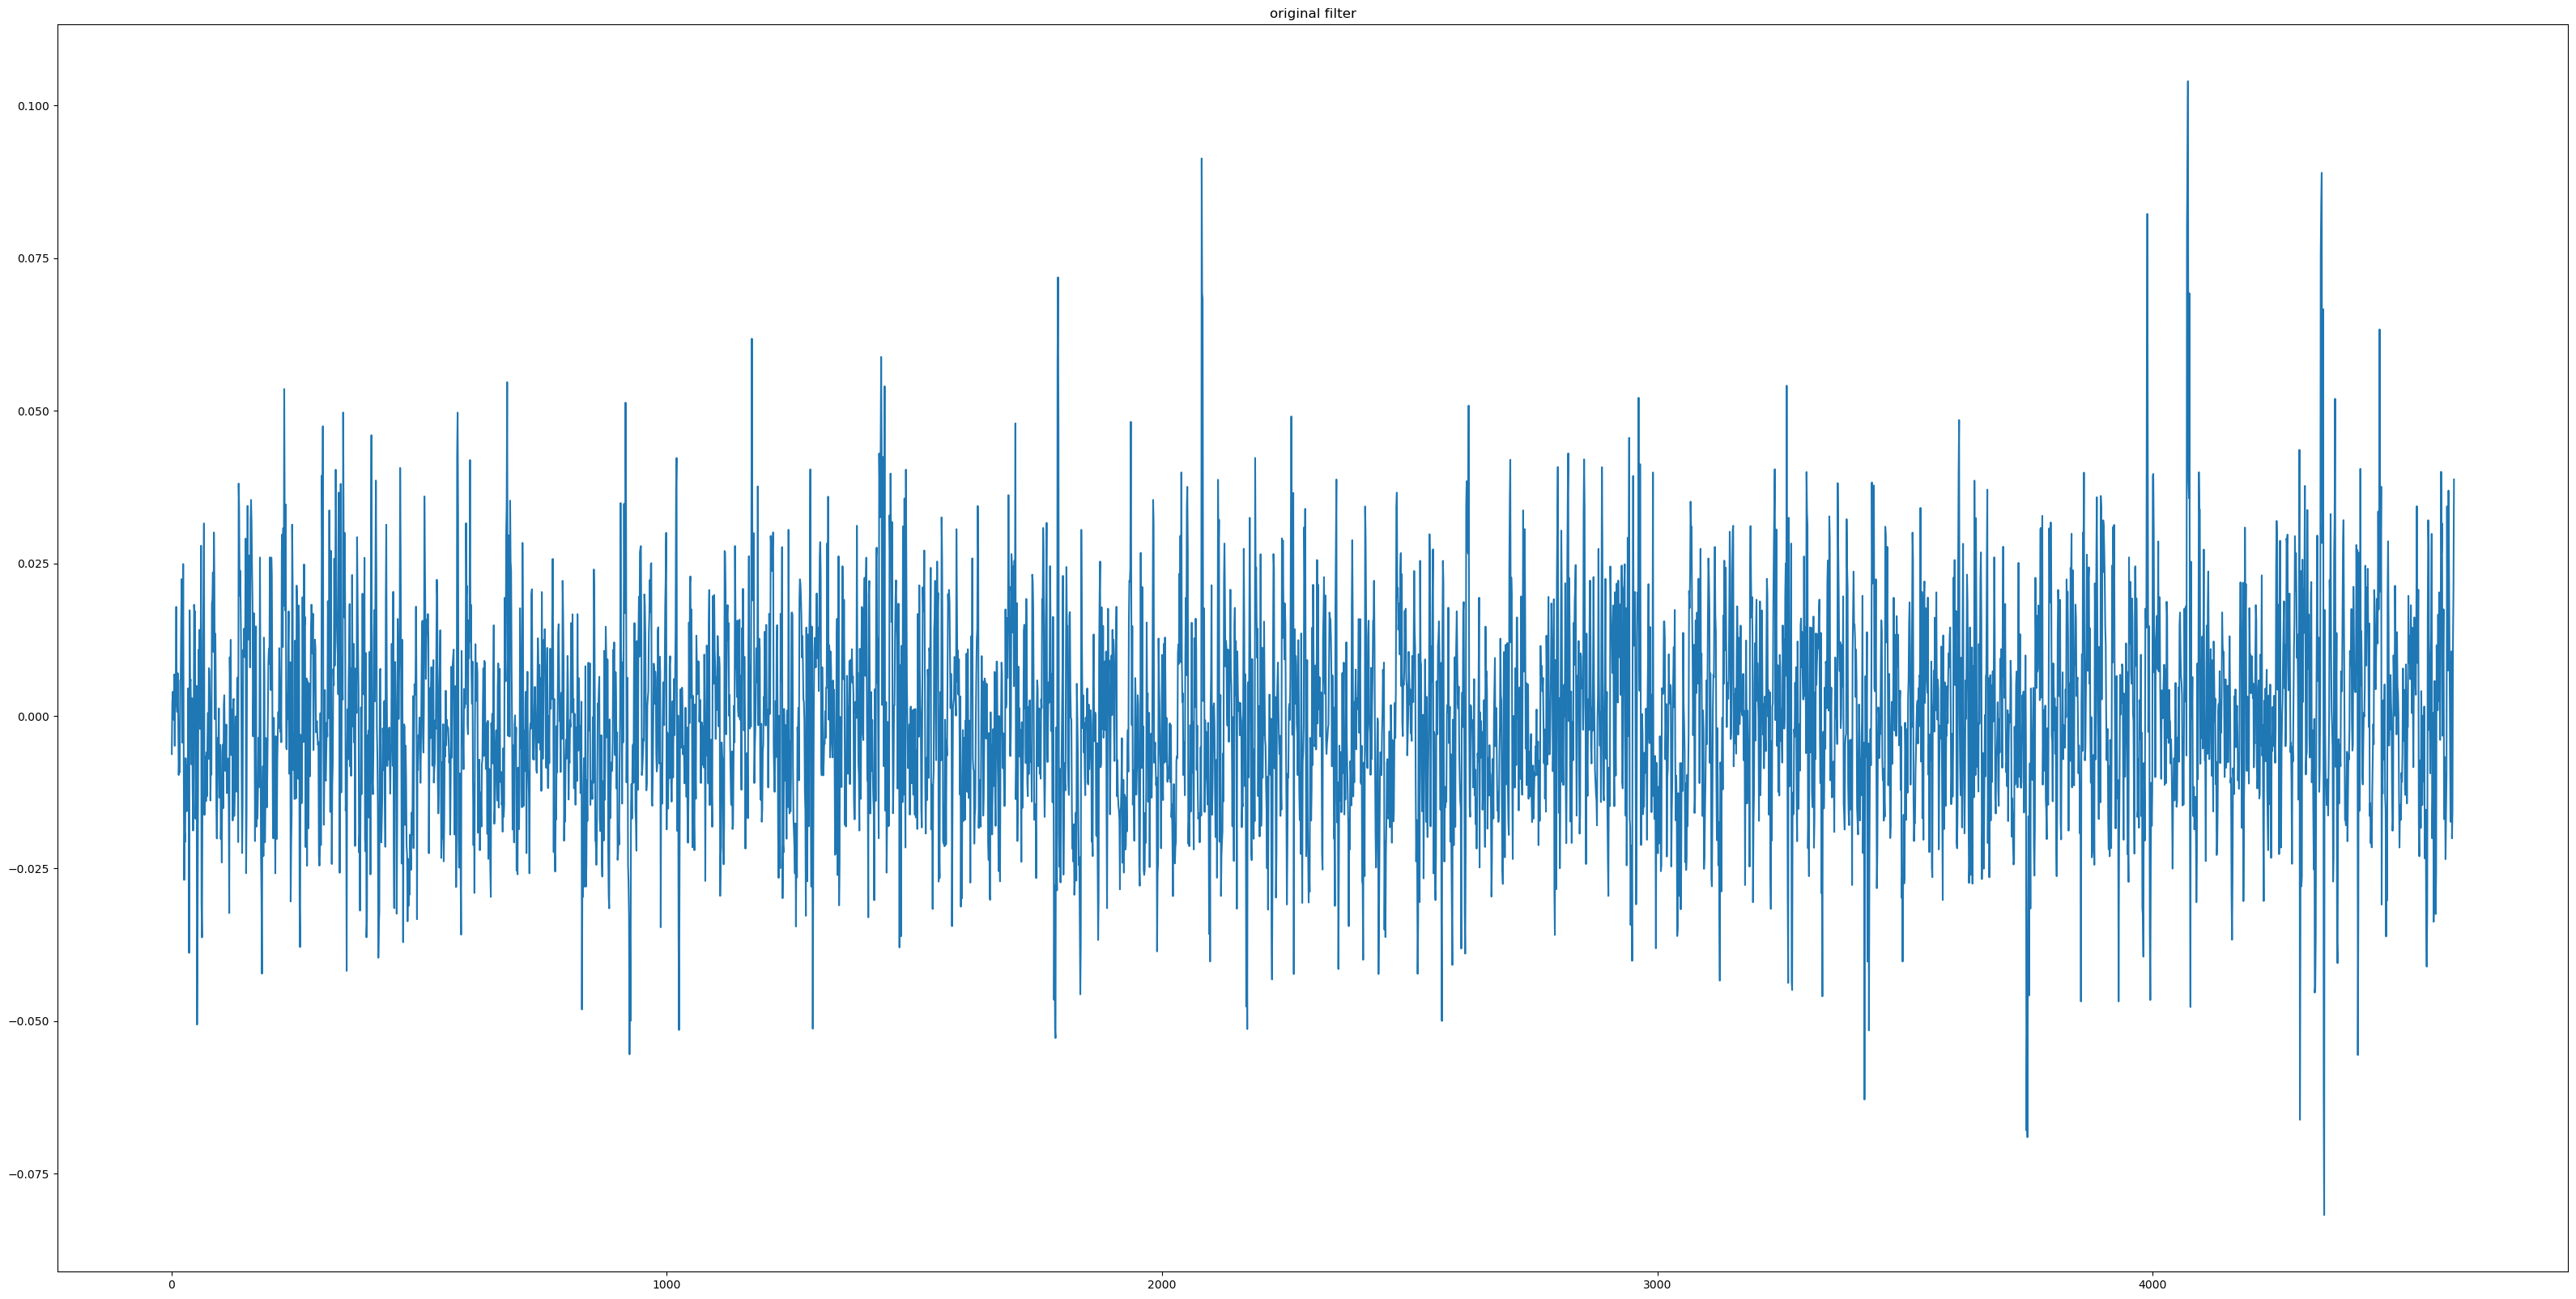

In [19]:
# case13 epoch 21 original filter
number = 2
val = (original_filter[number])
val = np.reshape(val,(3*3*512))
x = range(1,(3*3*512)+1)
plt.figure(figsize=(40,20))
plt.title("original filter")
plt.plot(x,val )
plt.show()

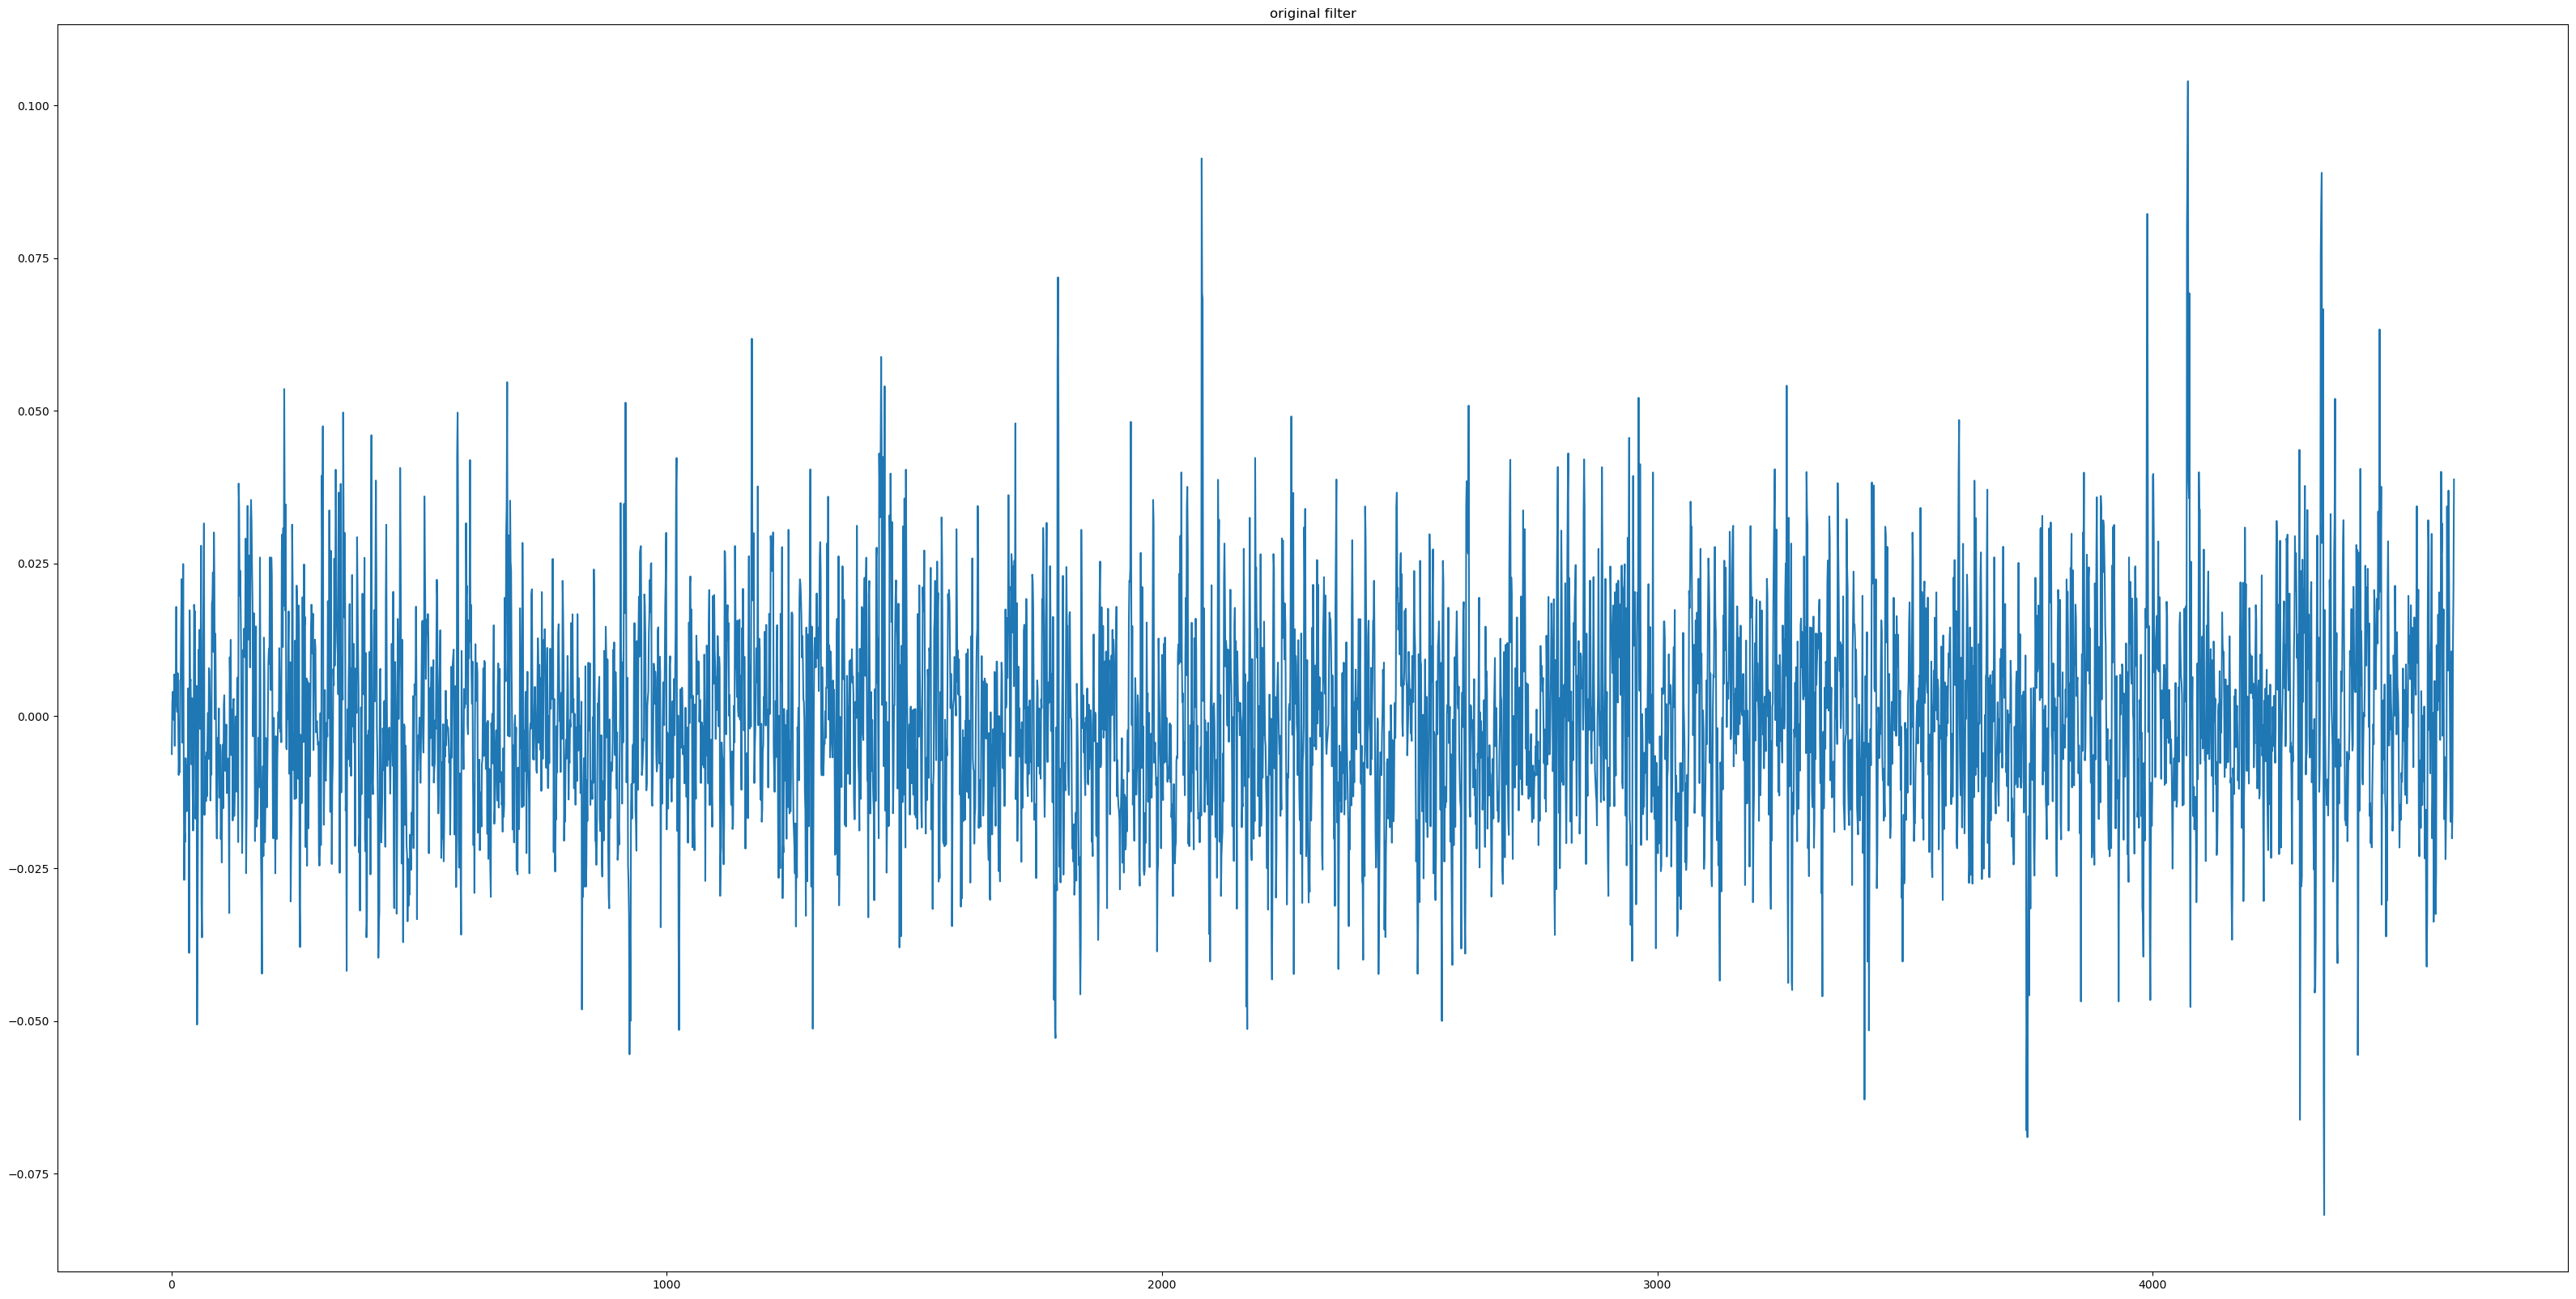

In [13]:
# case13 epoch 07 original filter
number = 2
val = (original_filter[number])
val = np.reshape(val,(3*3*512))
x = range(1,(3*3*512)+1)
plt.figure(figsize=(40,20))
plt.title("original filter")
plt.plot(x,val )
plt.show()

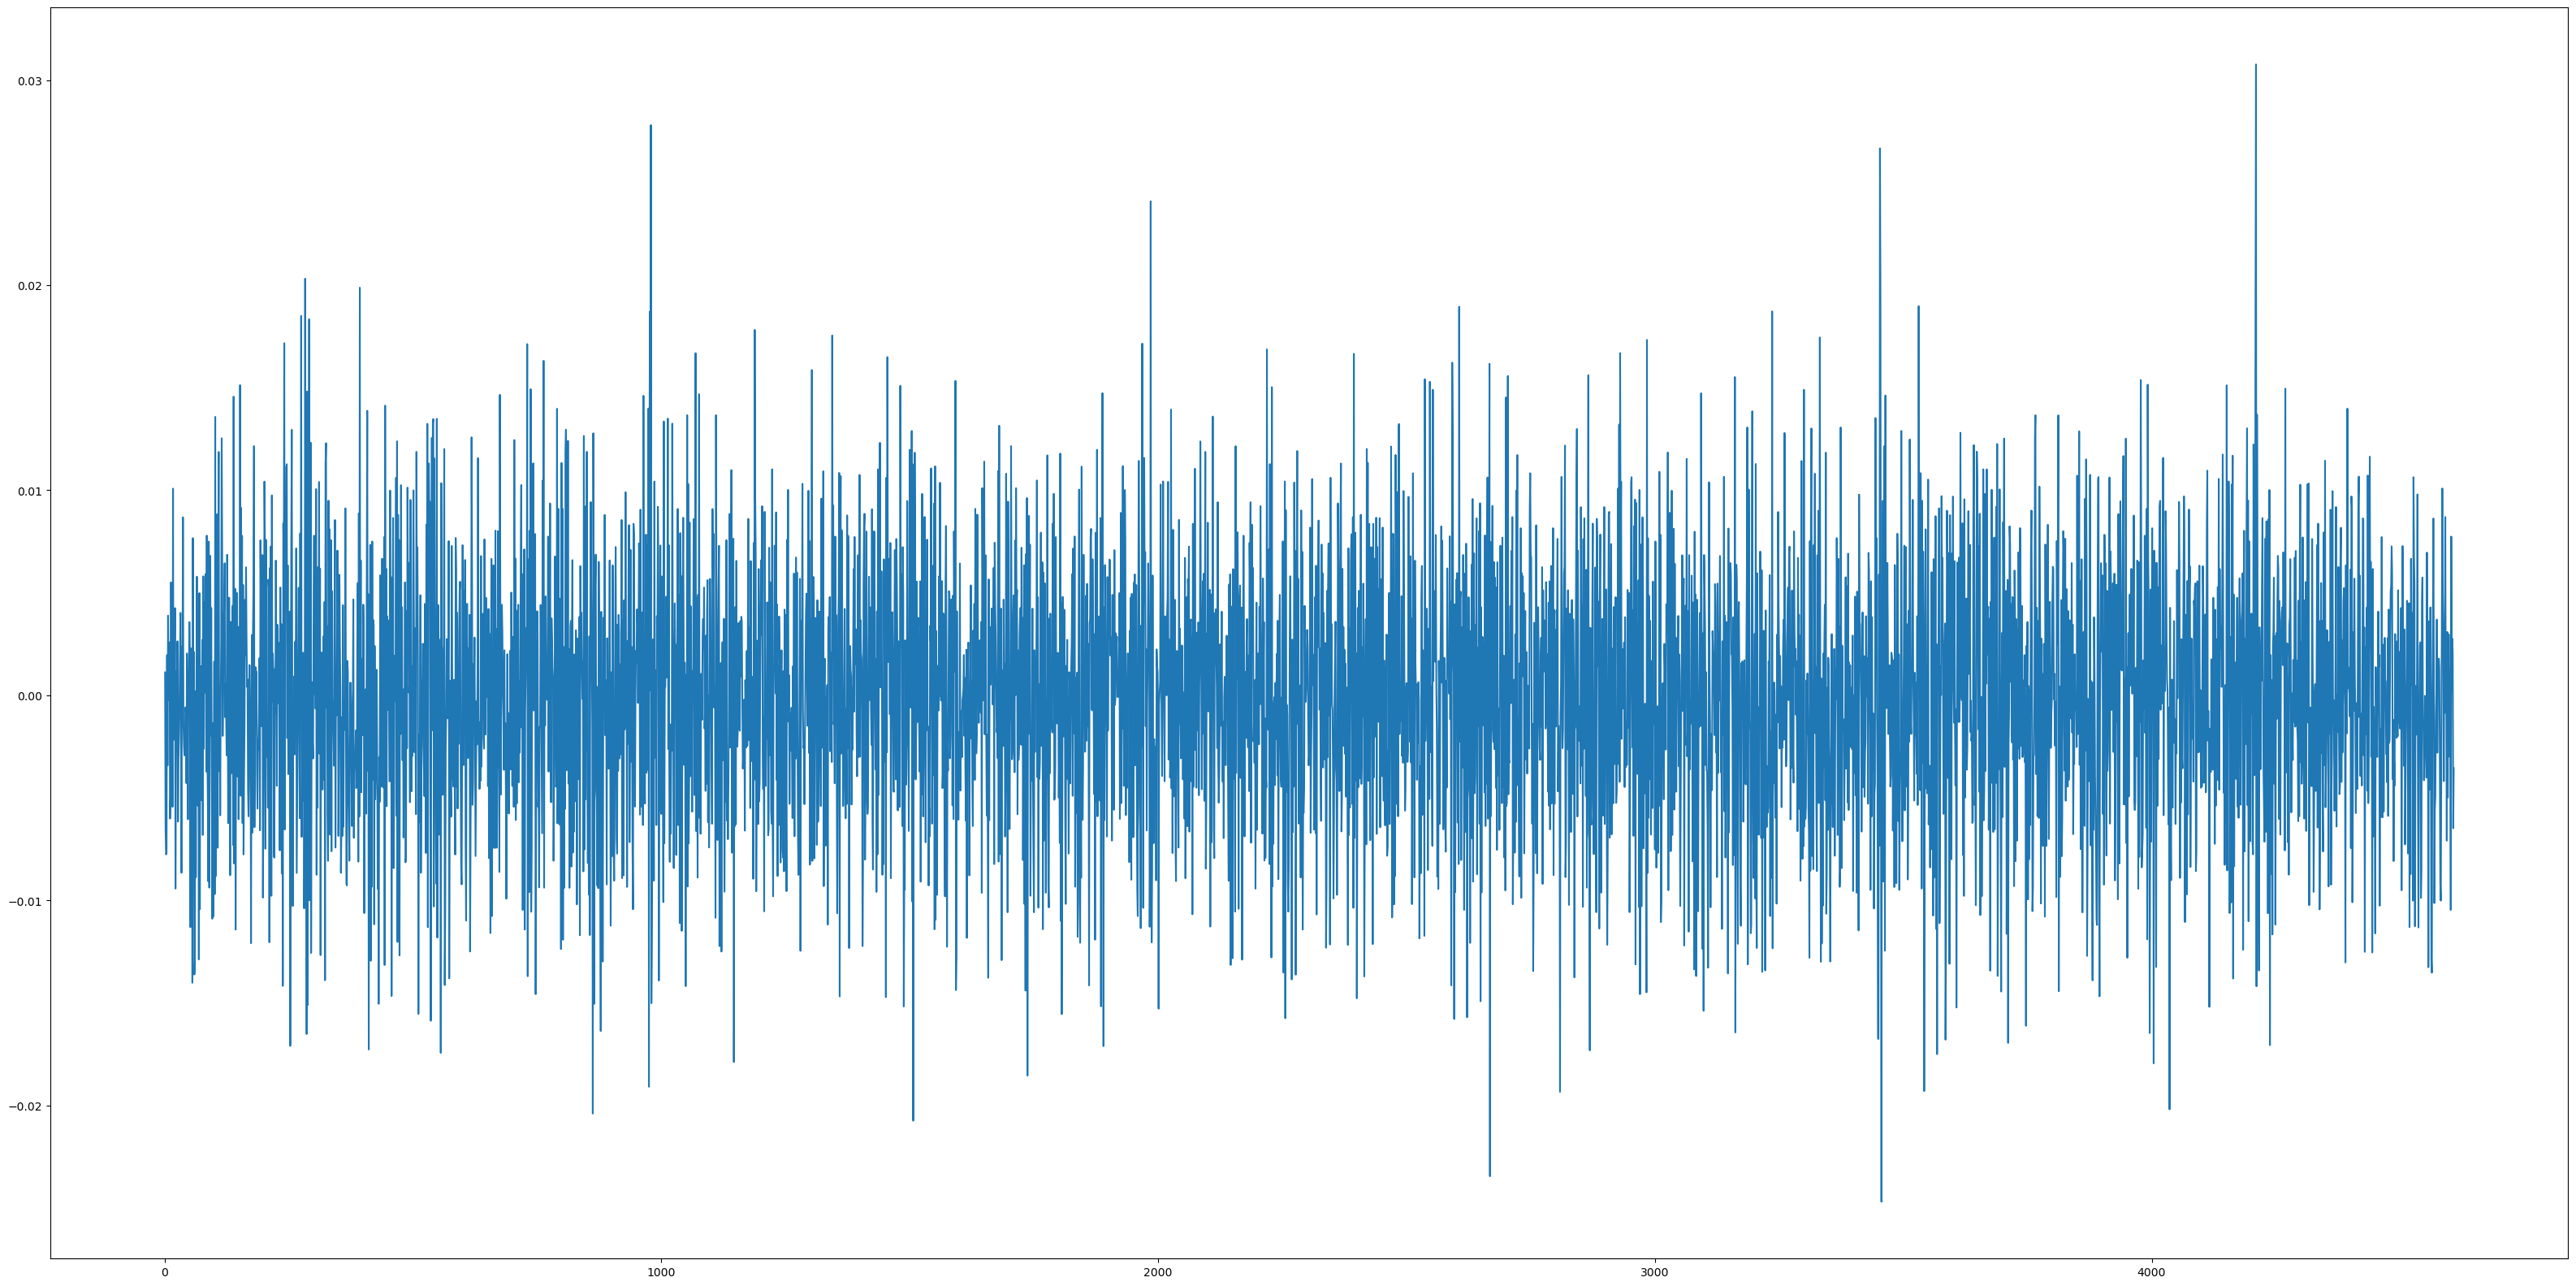

In [62]:
# case13 epoch 21
number = 2
val = (new_filter[number]-original_filter[number])
val = np.reshape(val,(3*3*512))
x = range(1,(3*3*512)+1)
plt.figure(figsize=(40,20))
plt.plot(x,val )
plt.show()

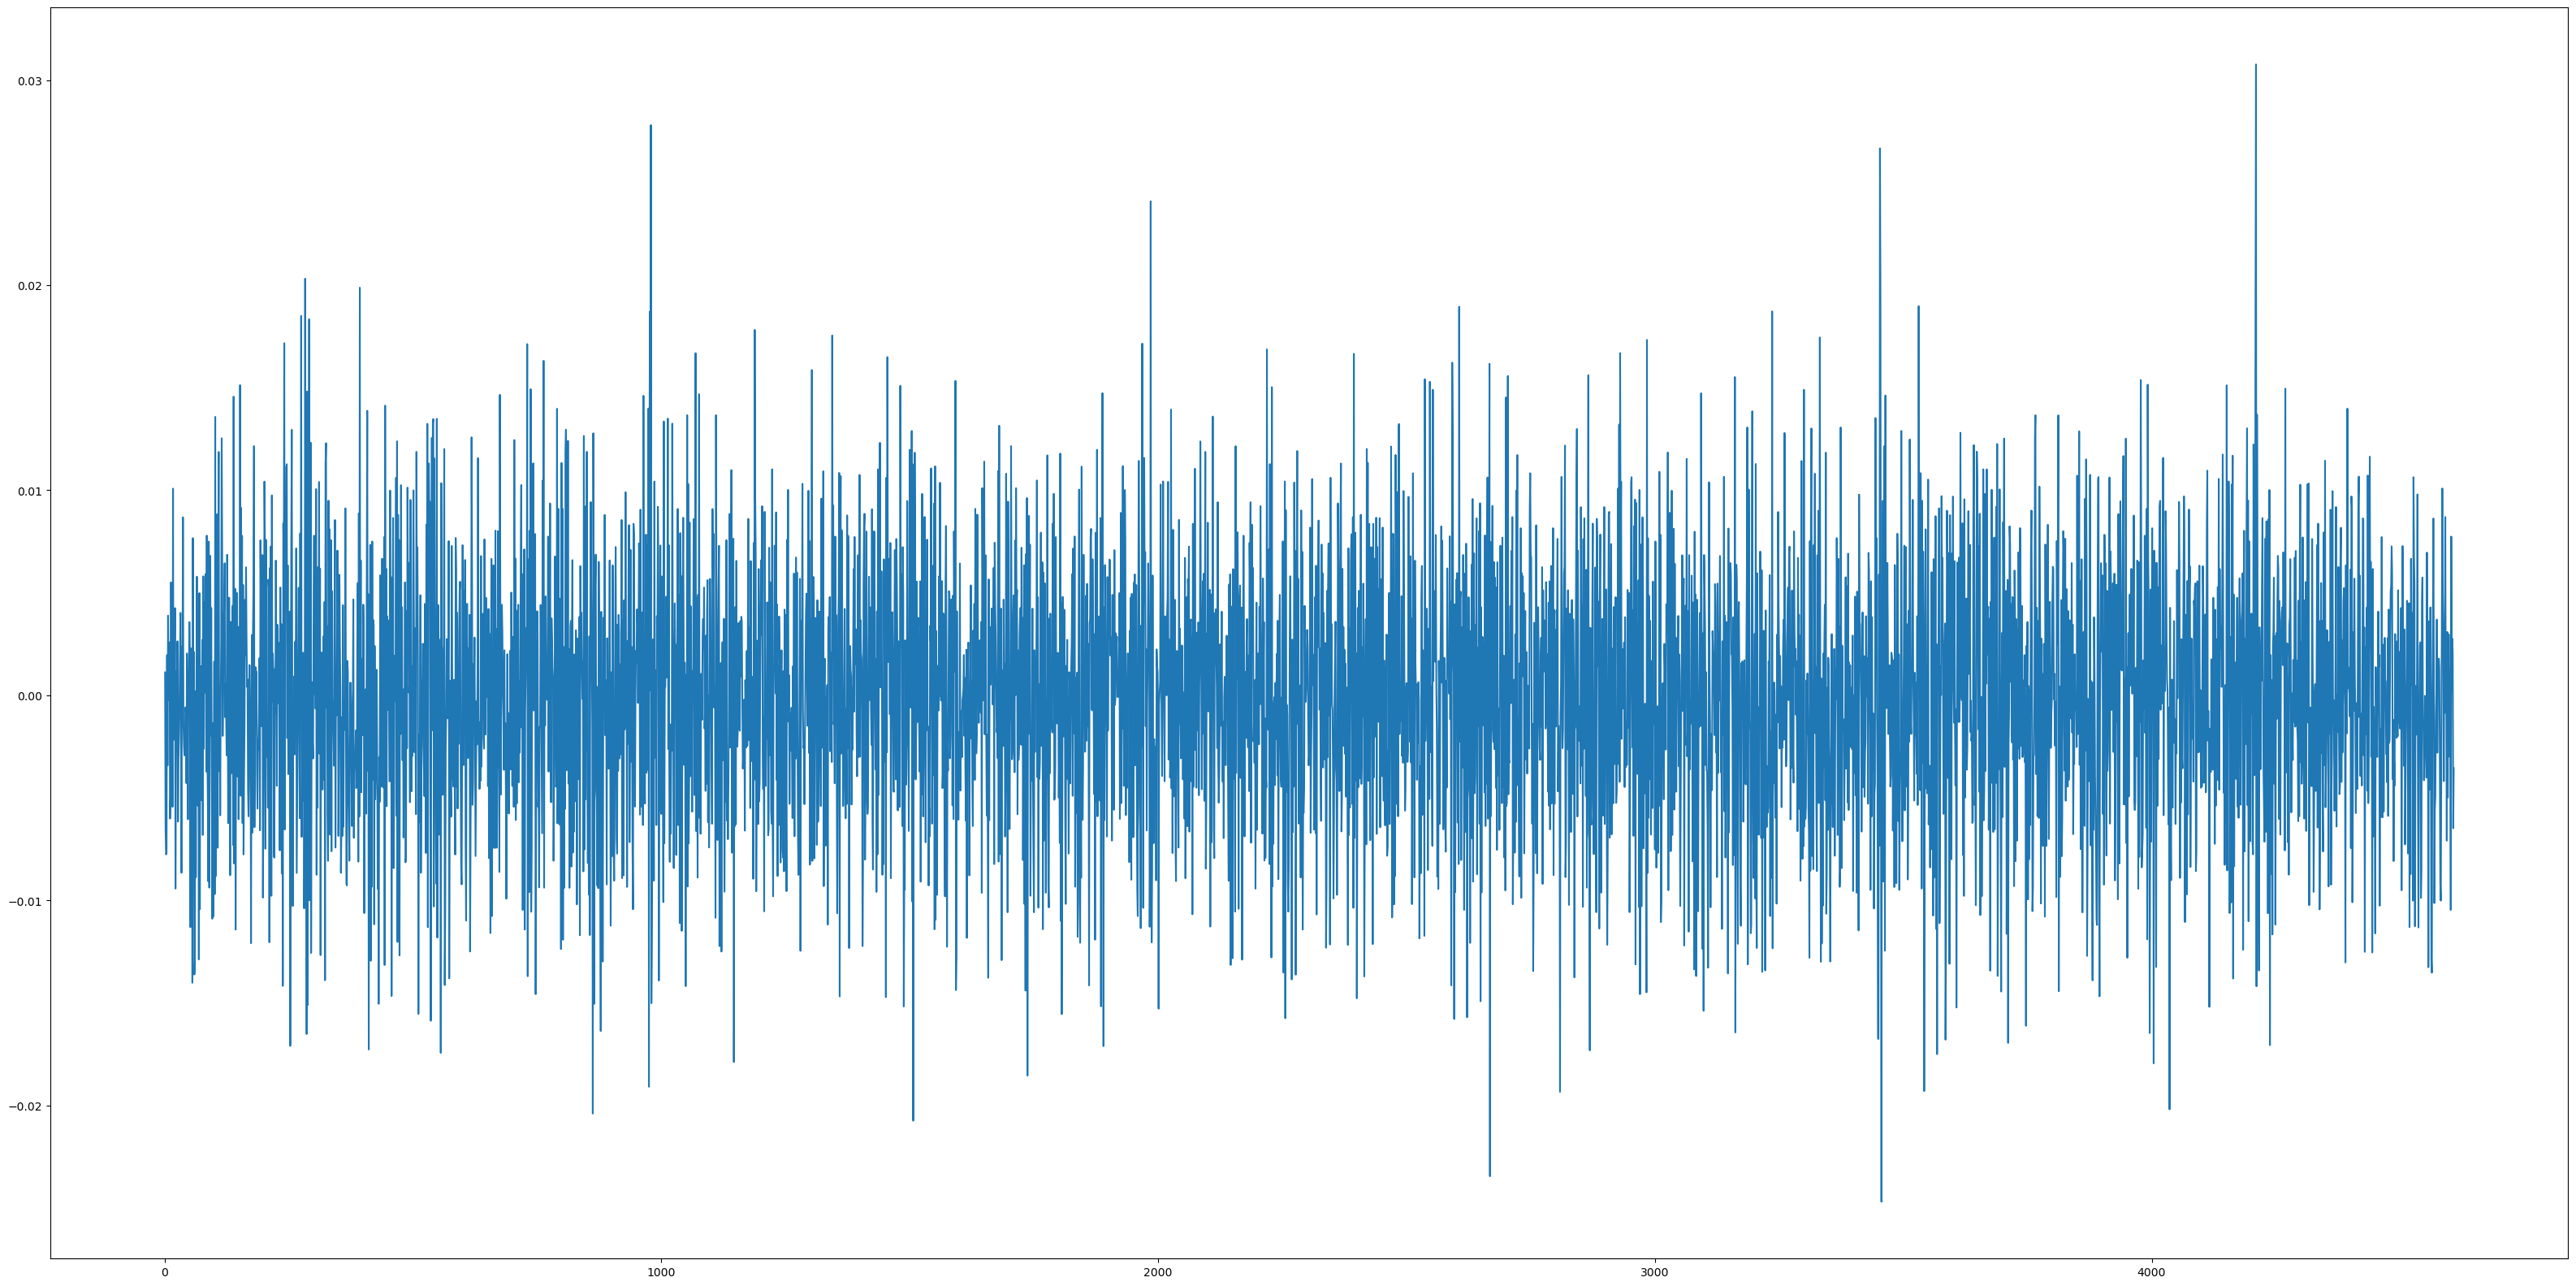

In [61]:
# case13 epoch 07 offset
number = 2
val = (new_filter[number]-original_filter[number])
val = np.reshape(val,(3*3*512))
x = range(1,(3*3*512)+1)
plt.figure(figsize=(40,20))
plt.plot(x,val )
plt.show()

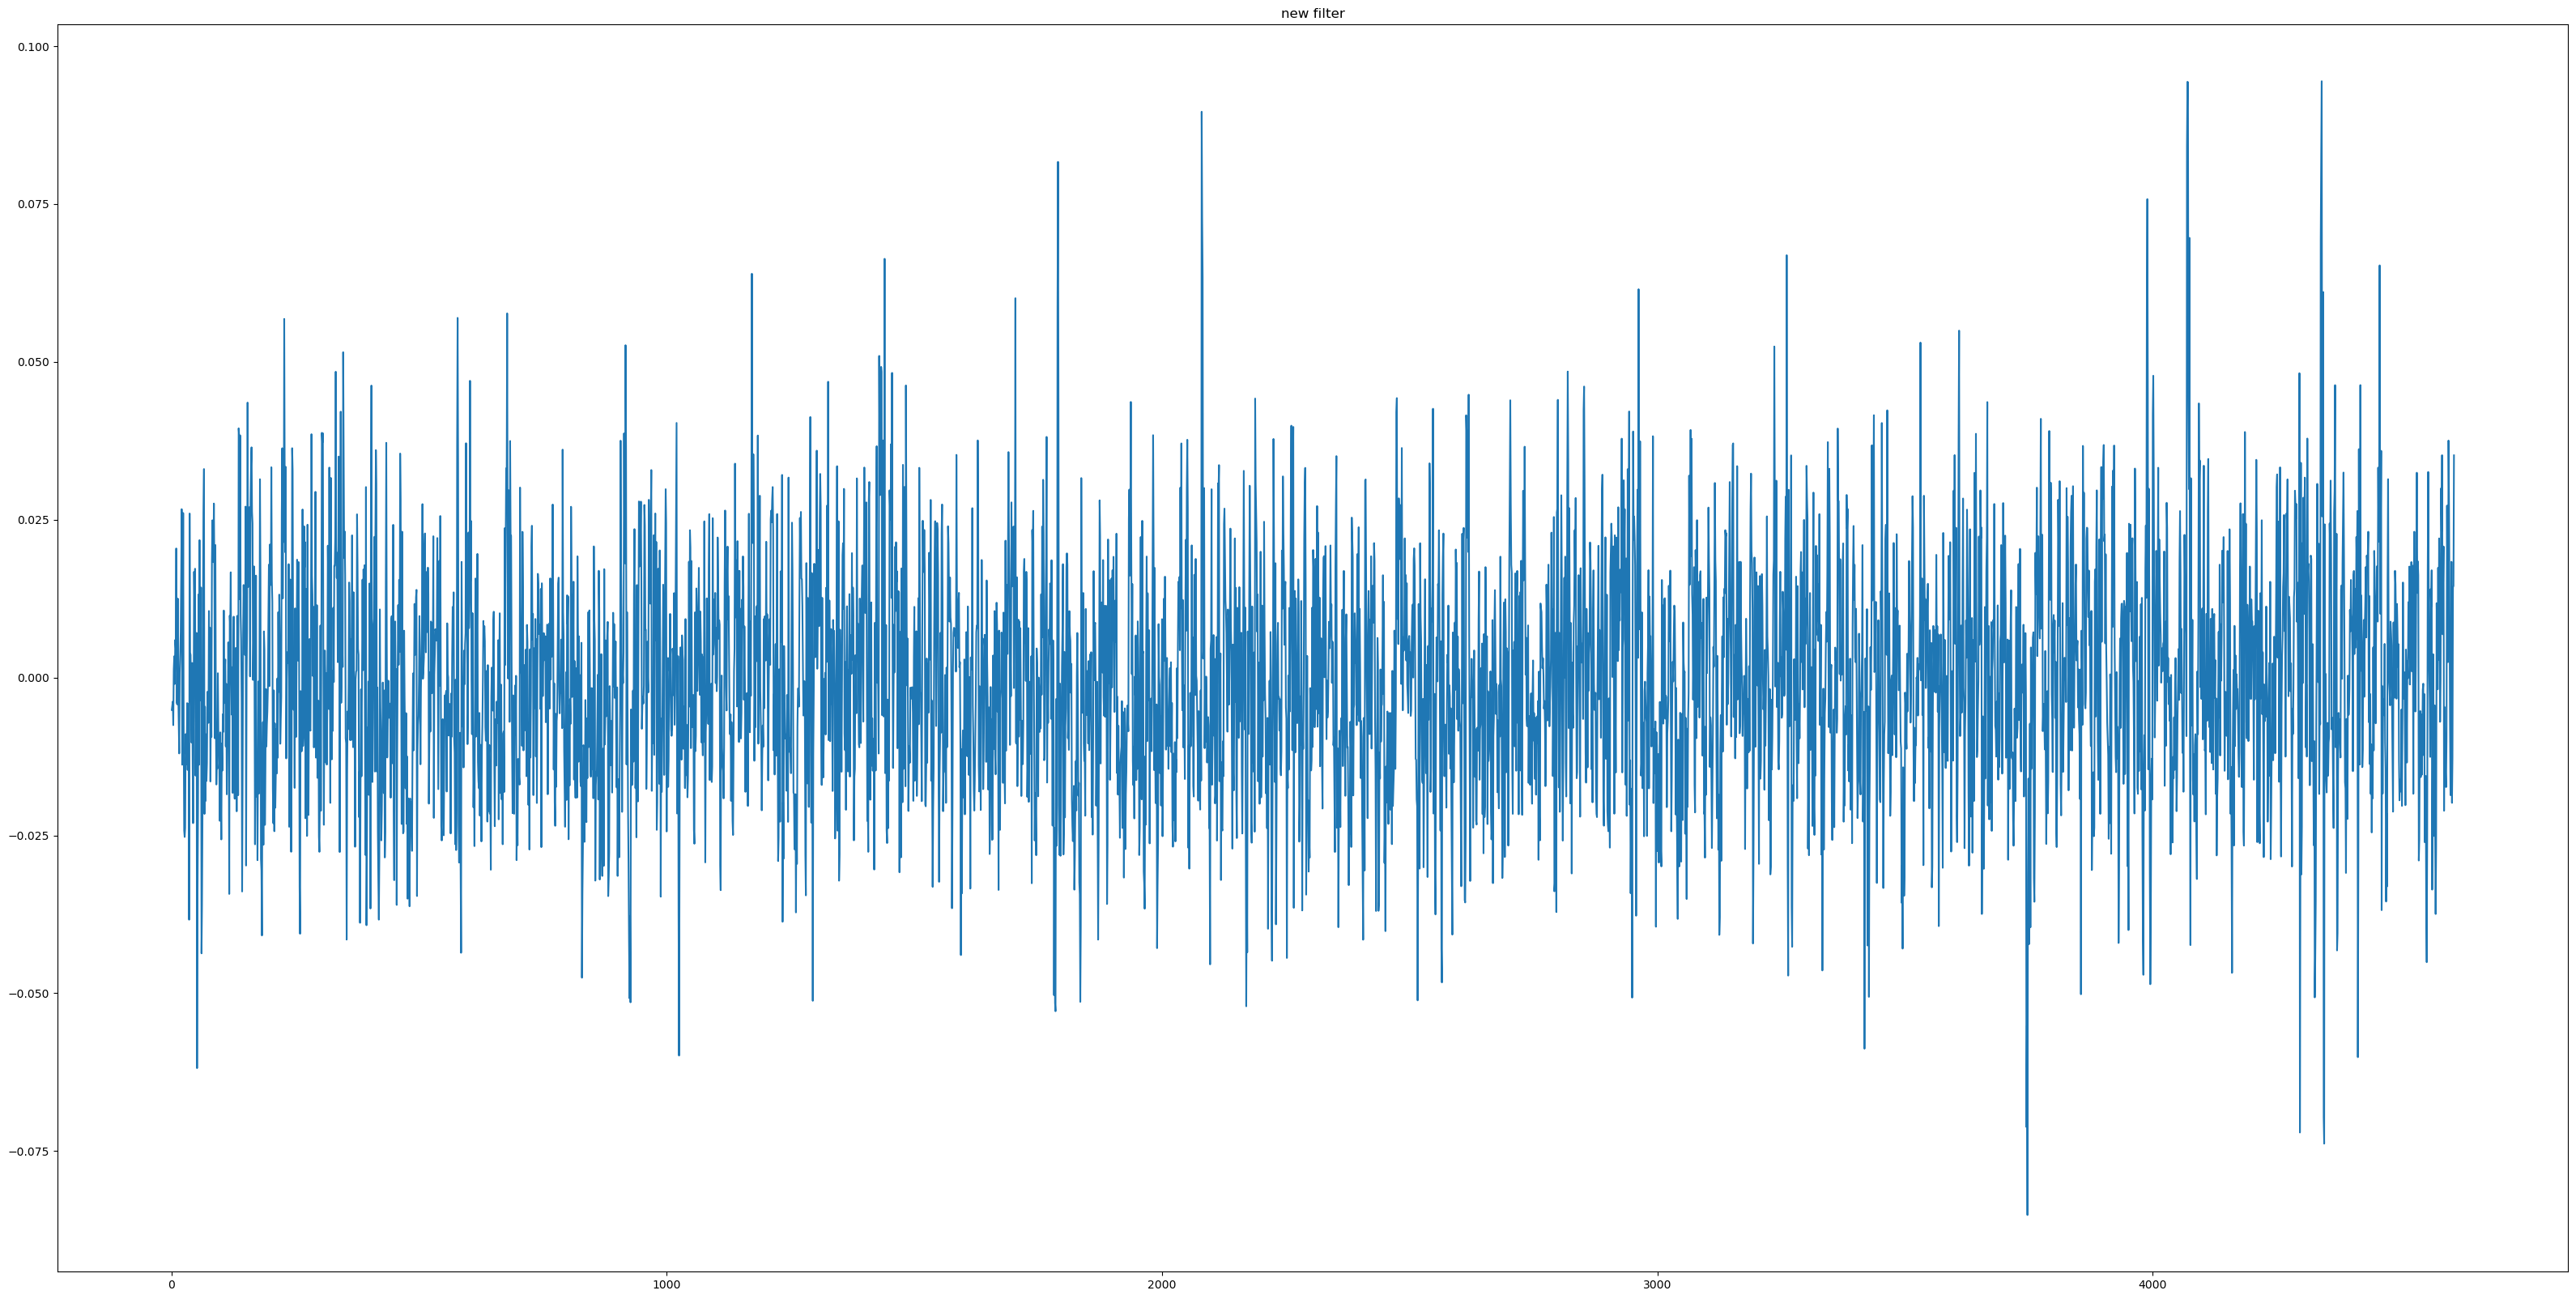

In [63]:
# case 13 epoch 21
number = 2
val = (new_filter[number])
val = np.reshape(val,(3*3*512))
x = range(1,(3*3*512)+1)
plt.figure(figsize=(40,20))
plt.title("new filter")
plt.plot(x,val )
plt.show()

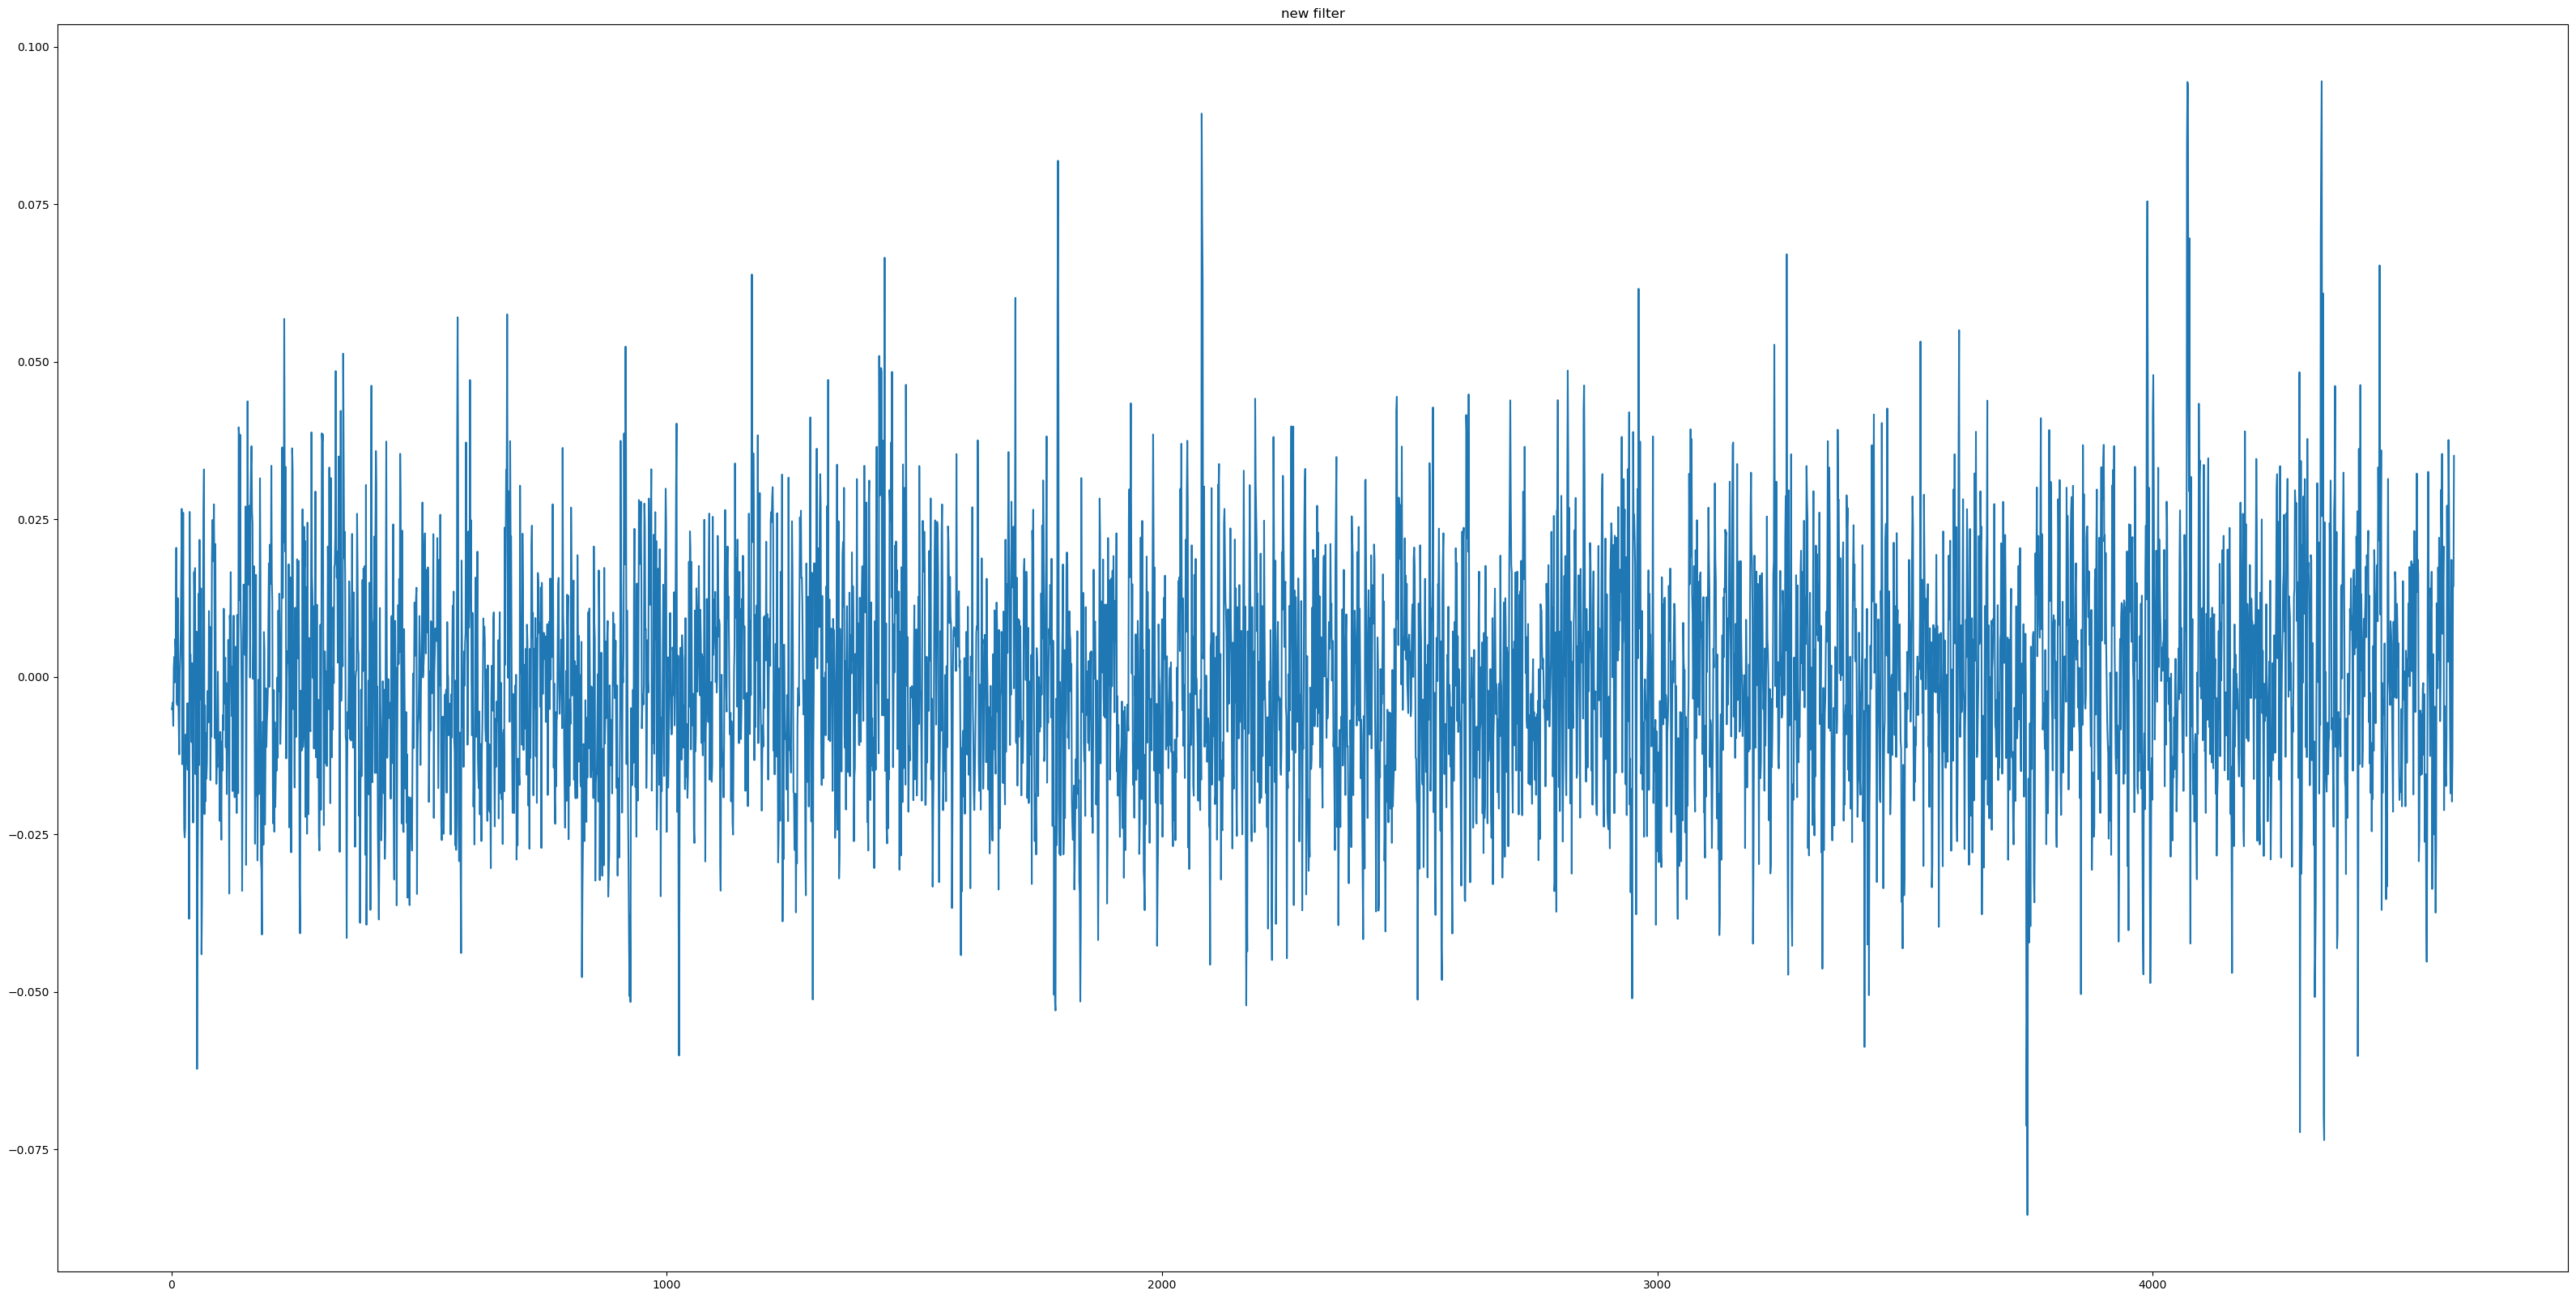

In [57]:
# case 13 epoch 07
number = 2
val = (new_filter[number])
val = np.reshape(val,(3*3*512))
x = range(1,(3*3*512)+1)
plt.figure(figsize=(40,20))
plt.title("new filter")
plt.plot(x,val )
plt.show()

In [24]:

val1 = (new_filter[1]-original_filter[1])
val2 = (new_filter[3]-original_filter[3])
print(np.equal(val1,val2))

[[[False False  True]
  [False  True False]
  [False False False]]

 [[False  True  True]
  [False False  True]
  [False  True False]]

 [[ True False  True]
  [ True False  True]
  [False  True  True]]

 ...

 [[ True  True  True]
  [ True  True False]
  [ True  True False]]

 [[ True False  True]
  [ True  True False]
  [False  True  True]]

 [[ True False  True]
  [False False  True]
  [ True  True  True]]]


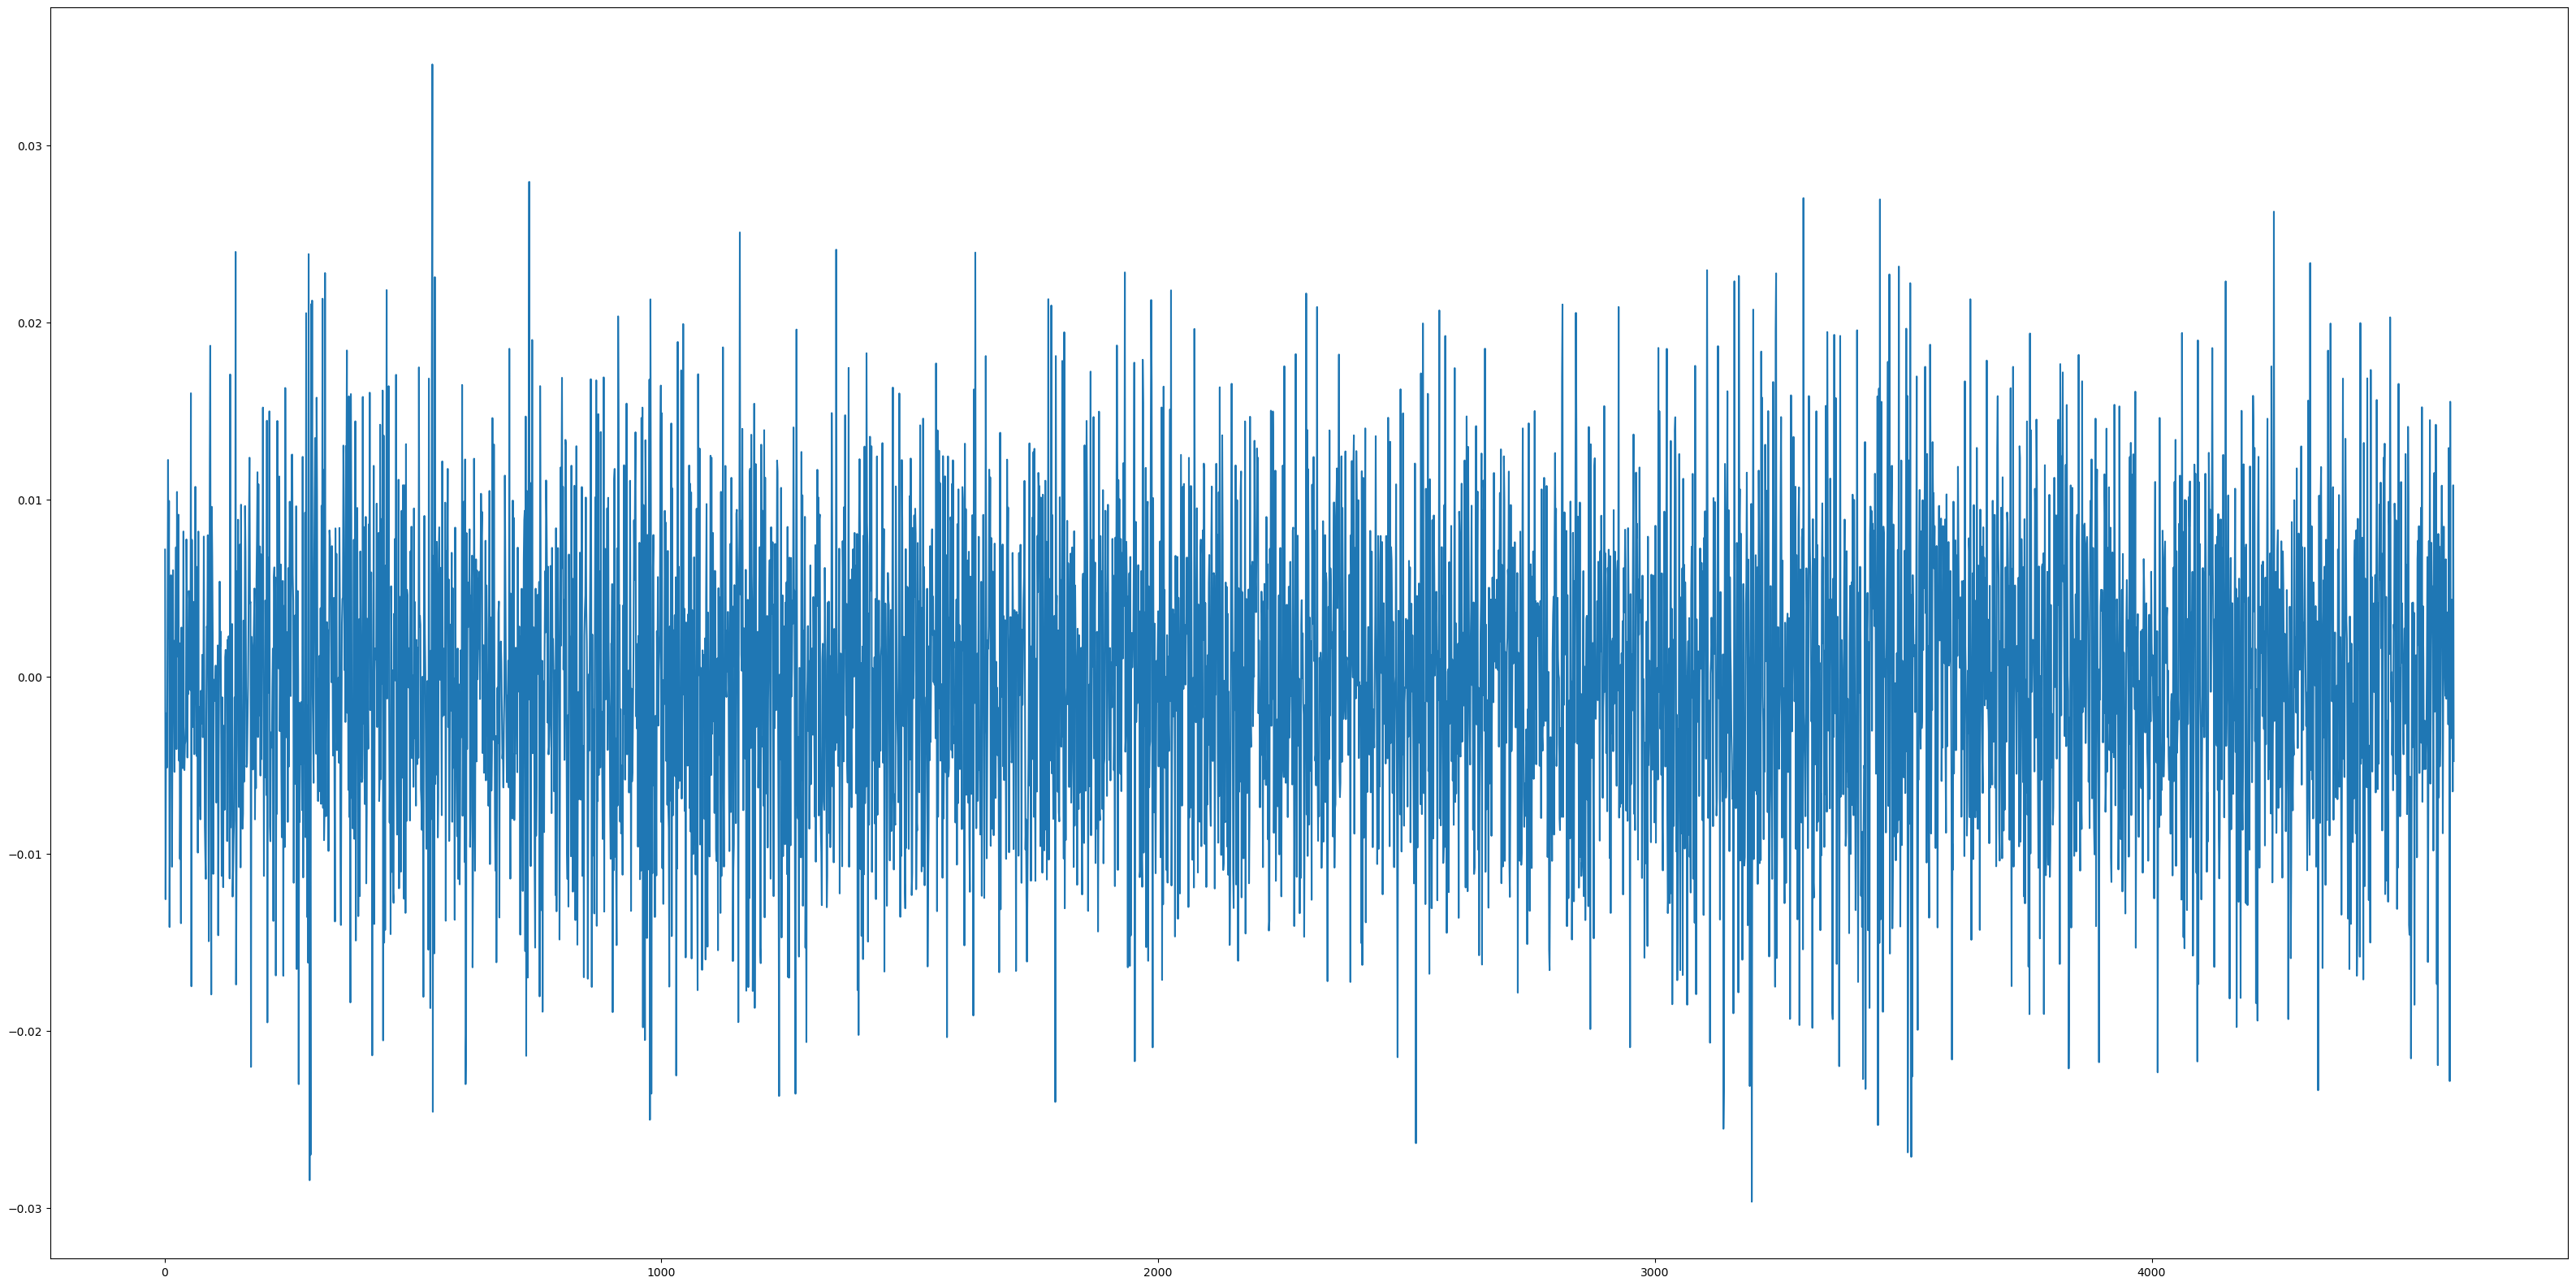

In [42]:
# case 11
number = 2
val = (new_filter[number]-original_filter[number])
val = np.reshape(val,(3*3*512))
x = range(1,(3*3*512)+1)
plt.figure(figsize=(40,20))
plt.plot(x,val )
plt.show()

In [36]:
val1[0][0][0], val2[0][0][0]
new_filter[1][0][0][1]-original_filter[1][0][0][1]
type(new_filter[1][0][0][1])

numpy.float32

In [35]:
for idx in range(512):
    print("%.16f" %(new_filter[idx][0][0][1]-original_filter[idx][0][0][1]))

-0.0060852854512632
-0.0060852859169245
-0.0060852854512632
-0.0060852849856019
-0.0060852854512632
-0.0060852859169245
-0.0060852859169245
-0.0060852859169245
-0.0060852854512632
-0.0060852854512632
-0.0060852849856019
-0.0060852854512632
-0.0060852859169245
-0.0060852854512632
-0.0060852859169245
-0.0060852859169245
-0.0060852859169245
-0.0060852854512632
-0.0060852859169245
-0.0060852854512632
-0.0060852859169245
-0.0060852859169245
-0.0060852859169245
-0.0060852859169245
-0.0060852859169245
-0.0060852840542793
-0.0060852854512632
-0.0060852859169245
-0.0060852859169245
-0.0060852859169245
-0.0060852854512632
-0.0060852859169245
-0.0060852859169245
-0.0060852849856019
-0.0060852854512632
-0.0060852849856019
-0.0060852859169245
-0.0060852859169245
-0.0060852859169245
-0.0060852859169245
-0.0060852854512632
-0.0060852859169245
-0.0060852840542793
-0.0060852859169245
-0.0060852859169245
-0.0060852859169245
-0.0060852859169245
-0.0060852840542793
-0.0060852854512632
-0.0060852854512632
